In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from matplotlib.colors import ListedColormap

In [279]:
cancer_data = load_breast_cancer()
sample = cancer_data.data

In [280]:
sample_df = pd.DataFrame(sample)
cancer_labels = cancer_data.target
labels = np.reshape(cancer_labels, (569, 1))
final_data = np.concatenate([sample, labels], axis = 1)

In [281]:
cancer_dataset = pd.DataFrame(final_data)
features = cancer_data.feature_names
features_labels = np.append(features, 'label')
cancer_dataset.columns = features_labels
cancer_dataset.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0


In [282]:
# Separation of features and ground truths.
X = cancer_dataset.iloc[:, 0:30].values
Y = cancer_dataset.iloc[:, 30].values

In [283]:
# Scalling all the data points except the ground truths.

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [284]:
# PCA Extraction

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Accuracy = []
Precision = []
Recall = []
F1_Score = []

for i in range(1,31):
    pca = PCA(n_components=i)
    principalNP = pca.fit_transform(X)
    finalNP = np.column_stack((principalNP, Y))
    x_train, x_test, y_train, y_test = train_test_split(principalNP, Y, train_size = 0.8, test_size = 0.2, random_state = 0)
    reg = LogisticRegression(random_state=0)
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    Accuracy.append(metrics.accuracy_score(y_test, y_pred)*100)
    Precision.append(metrics.precision_score(y_test, y_pred)*100)
    Recall.append(metrics.recall_score(y_test, y_pred)*100)
    F1_Score.append(metrics.f1_score(y_test, y_pred, average='micro')*100)

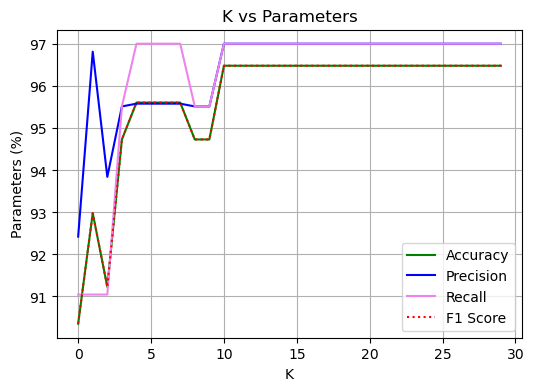

In [285]:
# Plotting the k vs Parameters
# Line plot for the linear regression model 
plt.plot(Accuracy, color='green', label='Accuracy')  
plt.plot(Precision, color='blue', label='Precision') 
plt.plot(Recall, color='violet', label='Recall') 
plt.plot(F1_Score, color='red', label='F1 Score', linestyle=":") 
plt.rcParams["figure.figsize"] = (6, 4) 
plt.grid(True) 
plt.xlabel('K') 
plt.ylabel('Parameters (%)') 
plt.title('K vs Parameters') 
plt.legend() 
plt.show() 

In [286]:
x_train.shape

(455, 30)

In [287]:
# Logistic regression.

reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [288]:
y_pred = reg.predict(x_test)
print(y_pred[0:3])

[0. 1. 1.]


In [289]:
# Checking the confusion matrix.

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[45,  2],
       [ 2, 65]], dtype=int64)

In [290]:
# Using "sklearn" library to check accuracy, precision, recall and F1 Score.

from sklearn import metrics
print("Accuracy: %.3f %%" %(metrics.accuracy_score(y_test, y_pred)*100))
print("Precision: %.3f %%" %(metrics.precision_score(y_test, y_pred)*100))
print("Recall: %.3f %%" %(metrics.recall_score(y_test, y_pred)*100))
print("F1 Score: %.3f %%" %(metrics.f1_score(y_test, y_pred, average='micro')*100)) # Global F1 score

Accuracy: 96.491 %
Precision: 97.015 %
Recall: 97.015 %
F1 Score: 96.491 %


Text(0.5, 357.55555555555554, 'Predicted label')

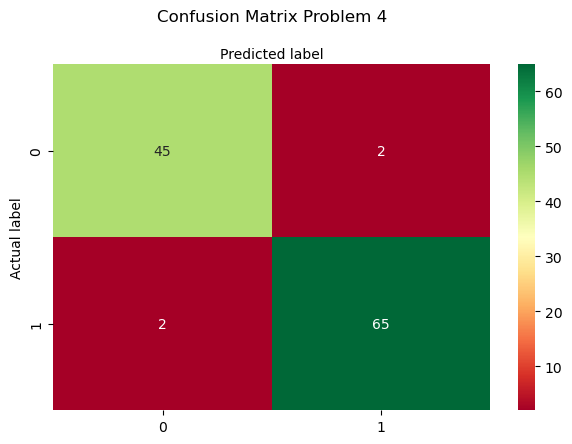

In [291]:
# Plotting the confusion matrix.
class_names=['Benign','Malignant'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="RdYlGn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Problem 4', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')